In [1]:
# Import des packages
import numpy as np
from matplotlib import pyplot as plt
from scipy.integrate import solve_ivp, odeint, quad
from scipy import misc, optimize
from numpy import abs, sin, sinh, cos, sin

In [2]:
# Calcul d'une intégrale pour simplifier l'écriture (éviter [0] à chaque fois)
def integrale(f,b1,b2) : return quad(f,b1,b2)[0]

class edo :
    # initialisation
    def __init__(self,f,λ,a,b) : 
        self.f = f
        self.λ = λ
        self.a = a
        self.b = b
        
    # solution exacte de l'edo de départ évaluée en x
    def sol_exa(self,x) :
        rac = np.sqrt(np.abs(self.λ))
    
        if self.λ>0 :
            Q=integrale(lambda x : sinh(rac*(self.b-x))*self.f(x),self.a,self.b)/(rac*sinh((self.a-self.b)*rac))
            return Q*sinh((self.a-x)*rac) - 1./rac * integrale(lambda s : sinh(rac*(x-s))*self.f(s),self.a,x)

        if self.λ==0 : 
            g = lambda t : integrale(self.f,self.a,t)
            return (self.a-x)/(self.a-self.b) * integrale(g,self.a,self.b) - integrale(g,self.a,x)

        if self.λ<0 :
            Q=integrale(lambda x : sin(rac*(self.b-x))*self.f(x),self.a,self.b)/(rac*sin((self.a-self.b)*rac))
            return Q*sin((self.a-x)*rac) - 1./rac * integrale(lambda s : sinh(rac*(x-s))*self.f(s),self.a,x)
       
    # définition de la fonction F(U,t) = U'(t)
    def F(self,U,t) : return [U[1],self.λ * U[0] - self.f(t)]
    
    # Résolution de l'edo de condition initiale u(a)=0 et u'(a) puis évaluation en b
    def sol_en_b(self,u1a) : return odeint(self.F,[0,u1a],[self.a,self.b]).T [0][-1]
    
    # Tracé de la solution exacte et de la solution de l'EDO avec condition initiale
    def graph(self,u1a) : 
        abs_exa = np.linspace(self.a,self.b,100)
        plt.plot(abs_exa,list(map(self.sol_exa,abs_exa)),color="blue")

        abs_exp = np.linspace(self.a,self.b,20)
        plt.scatter(abs_exp,odeint(self.F,[0,u1a],abs_exp).T [0],color="orange",marker="+")

0.08333333385417828


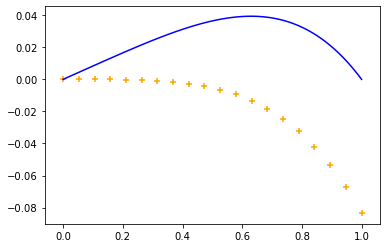

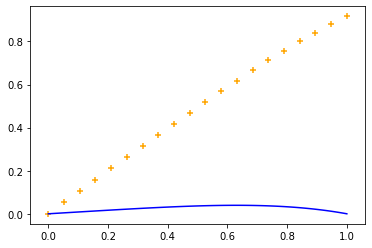

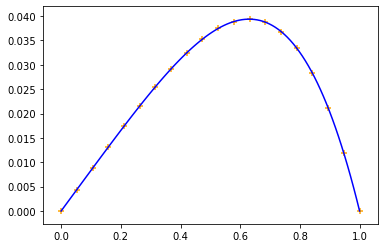

In [3]:
# CREATION DE L'OBJET

# objet edo avec paramètres f, λ, a, b
e1 = edo(lambda t : t**2,0,0,1)


# RESULTATS

# dichotomie pour fonction "évaluation de la solution en b" de paramètre "pente en a" avec resultat entre 0 et 1
res = optimize.brentq(e1.sol_en_b,0,1) 

# écriture de la dérivée initiale en a
print(res)

# affichage de la solution exacte et de la solution trouvée par la méthode de shooting
e1.graph(0)
plt.show()
e1.graph(1)
plt.show()
e1.graph(res)
plt.show()




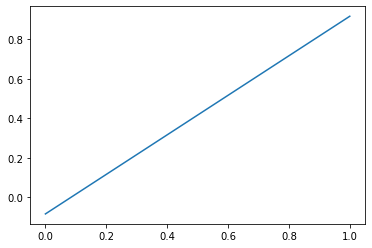

In [4]:
x=np.linspace(0,1,100)
plt.plot(x,list(map(e1.sol_en_b,x)))